In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from matplotlib import cm
from PIL import Image

import h5py
import glob

In [2]:
DATA_ROOT = "../../out/slots"  # "/mnt/evafs/groups/mandziuk-lab/akaminski/out/slots/"

In [3]:
def preprocess_image(img: npt.NDArray[np.float32]) -> npt.NDArray[np.uint8]:
    """
    Preprocesses an image by converting it to a 3-channel uint8 array.

    Parameters
    ----------
    img : numpy.typing.NDArray[np.float32]
        The input image array.

    Returns
    -------
    numpy.typing.NDArray[np.uint8]
        The preprocessed image array.
    """

    num_channels = img.shape[0]

    if num_channels == 1:
        img_2d = (np.squeeze(img, axis=0) * 255).astype(np.uint8)
        img = np.stack([img_2d] * 3, axis=0)
    return (np.transpose(img, axes=(1, 2, 0)) * 255).astype(np.uint8)

In [4]:
def plot_image(
    img: npt.NDArray[np.float32], ax=None, force_gray_scale: bool = False, **kwargs
) -> None:
    """
    Plot an image on the given axes.

    Parameters
    ----------
    img : numpy.ndarray
        The image to be plotted.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot the image. If not provided, the current axes will be used.

    Returns
    -------
    None
    """
    ax = ax or plt.gca()
    ax.imshow(
        Image.fromarray(preprocess_image(img)).convert(
            "L" if force_gray_scale else None
        ),
        **kwargs
    )
    ax.axis("off")

In [5]:
def show_predictions_during_training(
    data_root,
    img_num: int,
    # batch_num: int,
    job_id: int,
    dataset: str = None,
    epochs: list[int] | None = None,
    epochs_slots: list[tuple[int]] | None = None,
    force_gray_scale: bool = False,
    img_kwargs: dict = {},
):
    """
    Display the original and predicted images during training for different epochs.

    Parameters
    ----------
    data_root : str
        The root directory of the data with predictions.
    img_num : int
        The index of the image to display.
    epochs : list[int] | None, optional
        The list of epochs to display. If None, all available epochs will be displayed.

    Returns
    -------
    None
    """
    available_epochs_steps = {}  # dict[dataset_name, list[tuple[epoch, step]]]
    with h5py.File(os.path.join(DATA_ROOT, f"{job_id}_slots.hy")) as x:
        for key in x.keys():
            dataset, epoch, step = key.split("__")
            epoch = int(epoch.split("=")[1])
            step = int(step.split("=")[1])

            curr = available_epochs_steps.get(dataset, [])
            curr.append((epoch, step))
            available_epochs_steps[dataset] = curr

    if epochs_slots is None:
        epochs_slots = [
            (dataset, epoch_step) for epoch_step in available_epochs_steps[dataset]
        ]
    if epochs is not None:
        epochs_slots = [
            epoch_slot for epoch_slot in epochs_slots if epoch_slot[1][0] in epochs
        ]
    # TODO: implement "some" logic to filter it correctly

    epochs_slots = sorted(epochs_slots)

    nrows = 1  # len(datasets)
    ncols = 1 + len(epochs_slots)
    # TODO: handling multiple datasets
    fig, axes = plt.subplots(nrows, ncols, figsize=(2 + ncols * 3, 4 + 2 * nrows))
    with h5py.File(os.path.join(data_root, f"{job_id}_slots.hy")) as x:
        for i, (ax, epoch_slot) in enumerate(zip(axes.flat[1:], epochs_slots)):
            dataset_nm, (epoch_num, step_num) = epoch_slot
            # for key in x.keys():
            key = f"{dataset_nm}__epoch={epoch_num}__step={step_num}"
            fig.suptitle(f"JOB ID: {job_id}")
            if i == 0:
                axes.flat[0].set_title(f"Original Image {dataset_nm}\n")
                plot_image(
                    np.array(x[key]["original_img"])[img_num][0],
                    axes.flat[0],
                    force_gray_scale=force_gray_scale,
                    **img_kwargs,
                )

            ax.set_title(
                # f"Predicted Image ({dataset_nm})\n"
                f"epoch = {epoch_num}, step = {step_num}"
            )
            plot_image(
                np.array(x[key]["pred_img"])[img_num][0],
                ax=ax,
                force_gray_scale=force_gray_scale,
                **img_kwargs,
            )

In [6]:
job_ids = [int(x.split("_")[0]) for x in os.listdir(DATA_ROOT)]

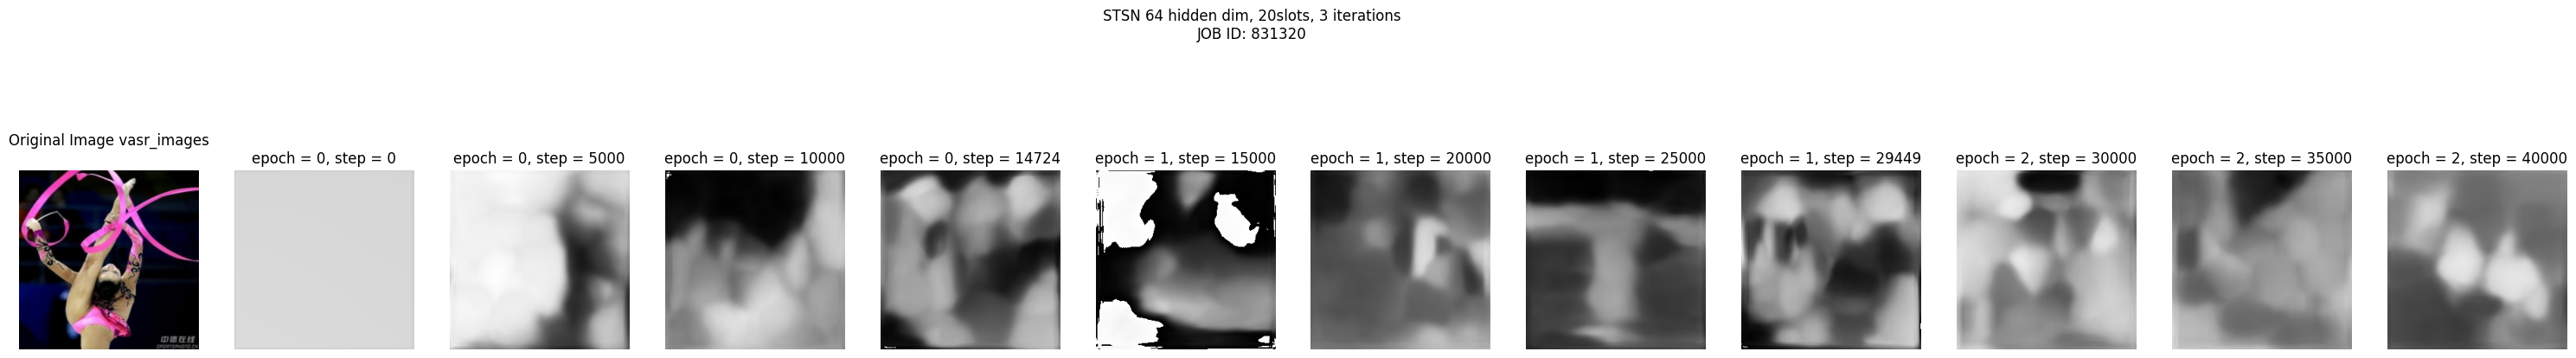

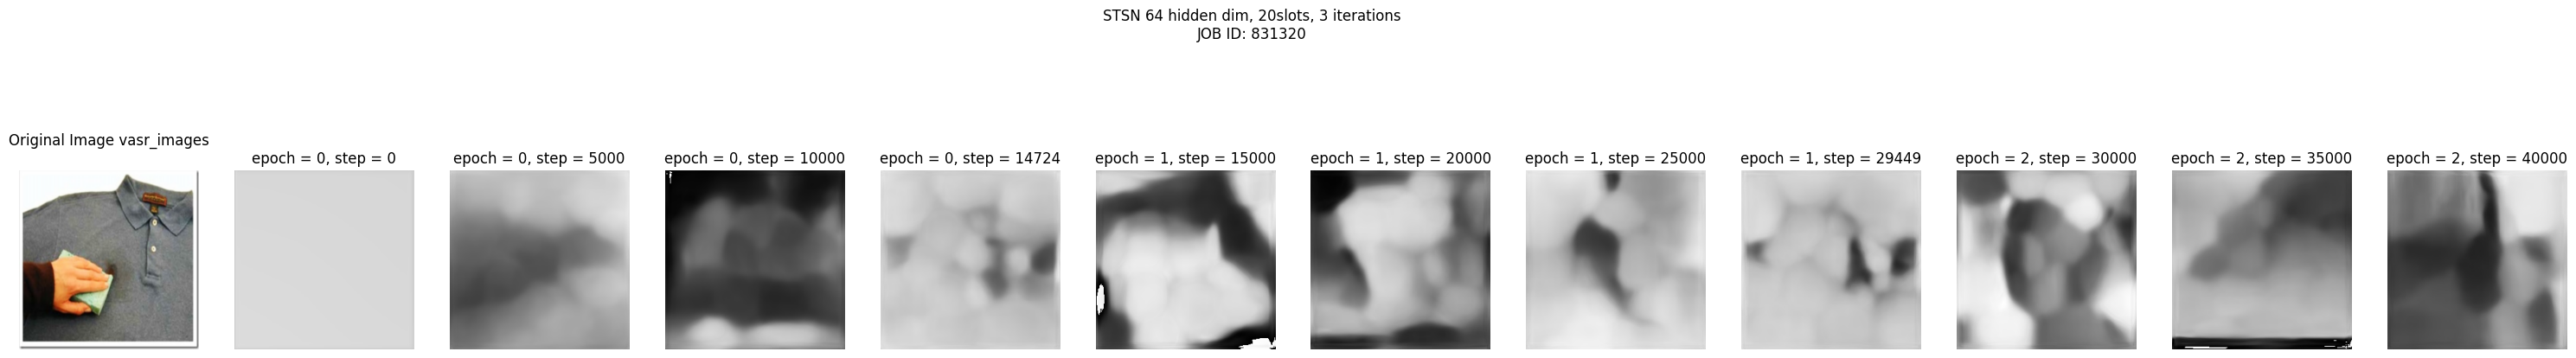

In [7]:
for img_num in range(2):
    show_predictions_during_training(
        DATA_ROOT,
        img_num=img_num,
        # batch_num=0,
        job_id=831320,
        dataset="vasr_images ",  # "bongard_hoi_images", "vasr_images"
        # epochs=None,
        # force_gray_scale=True,
        # img_kwargs={"cmap": cm.Greys_r},
    )
    # if img_num == 0:
    plt.suptitle("STSN 64 hidden dim, 20slots, 3 iterations\nJOB ID: 831320")
    plt.show()

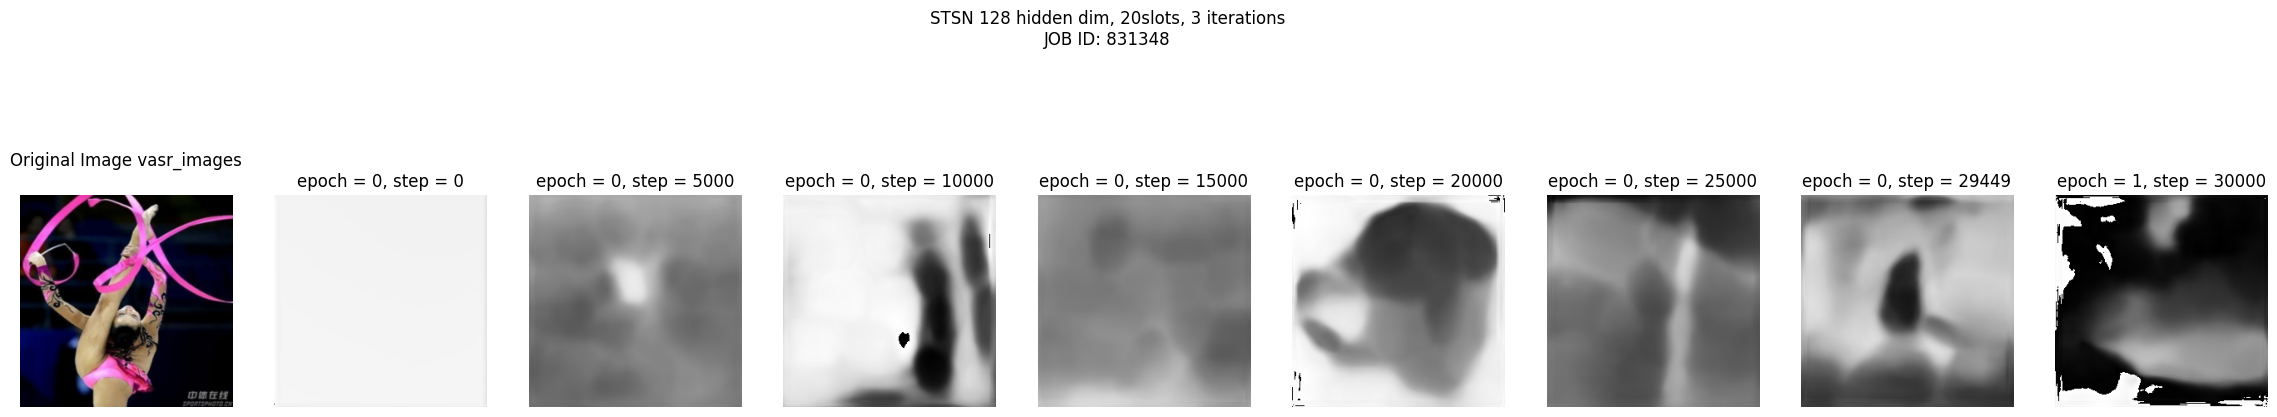

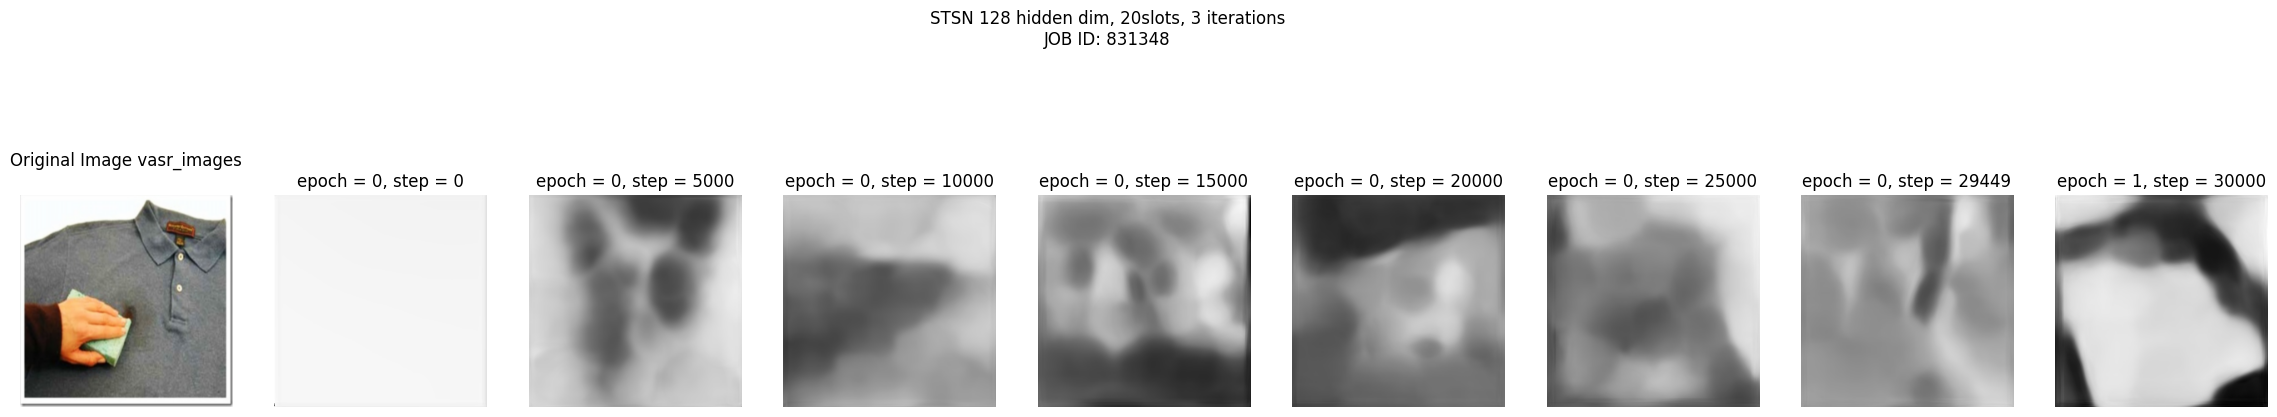

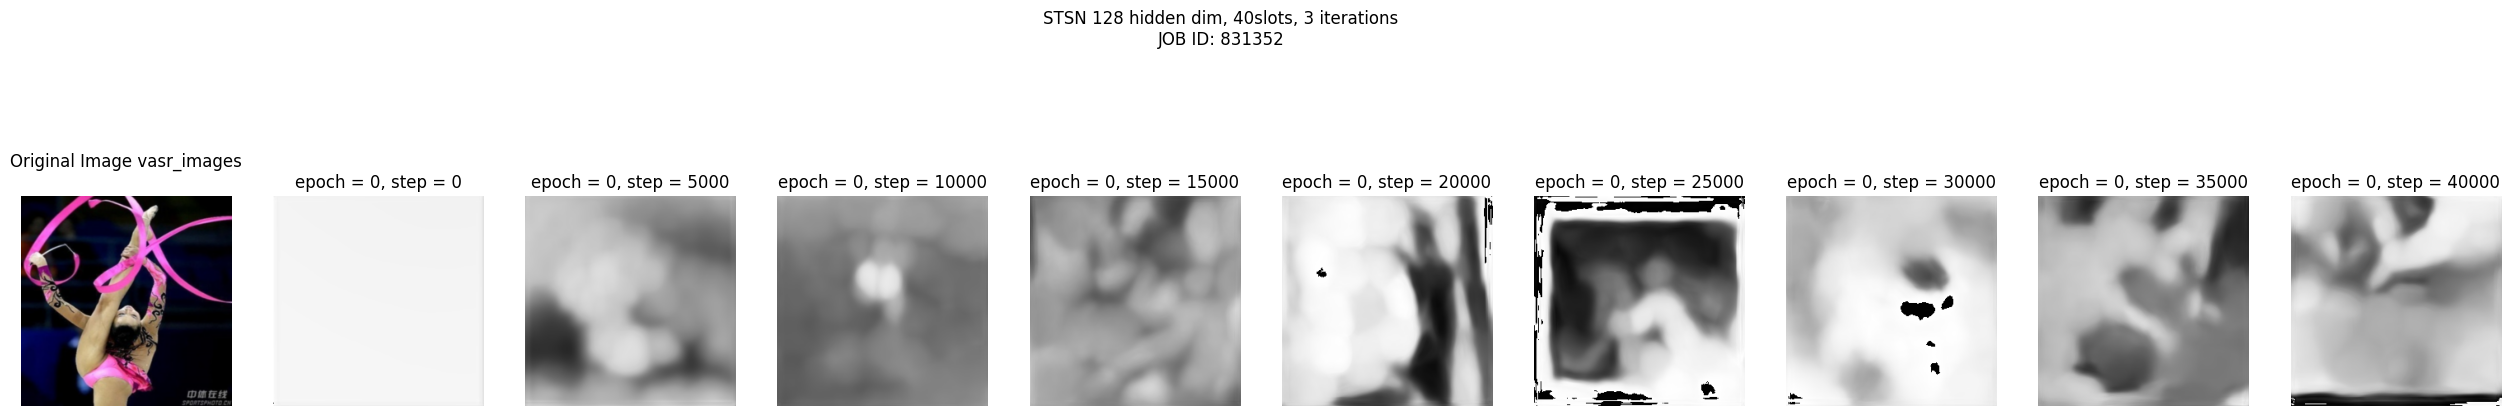

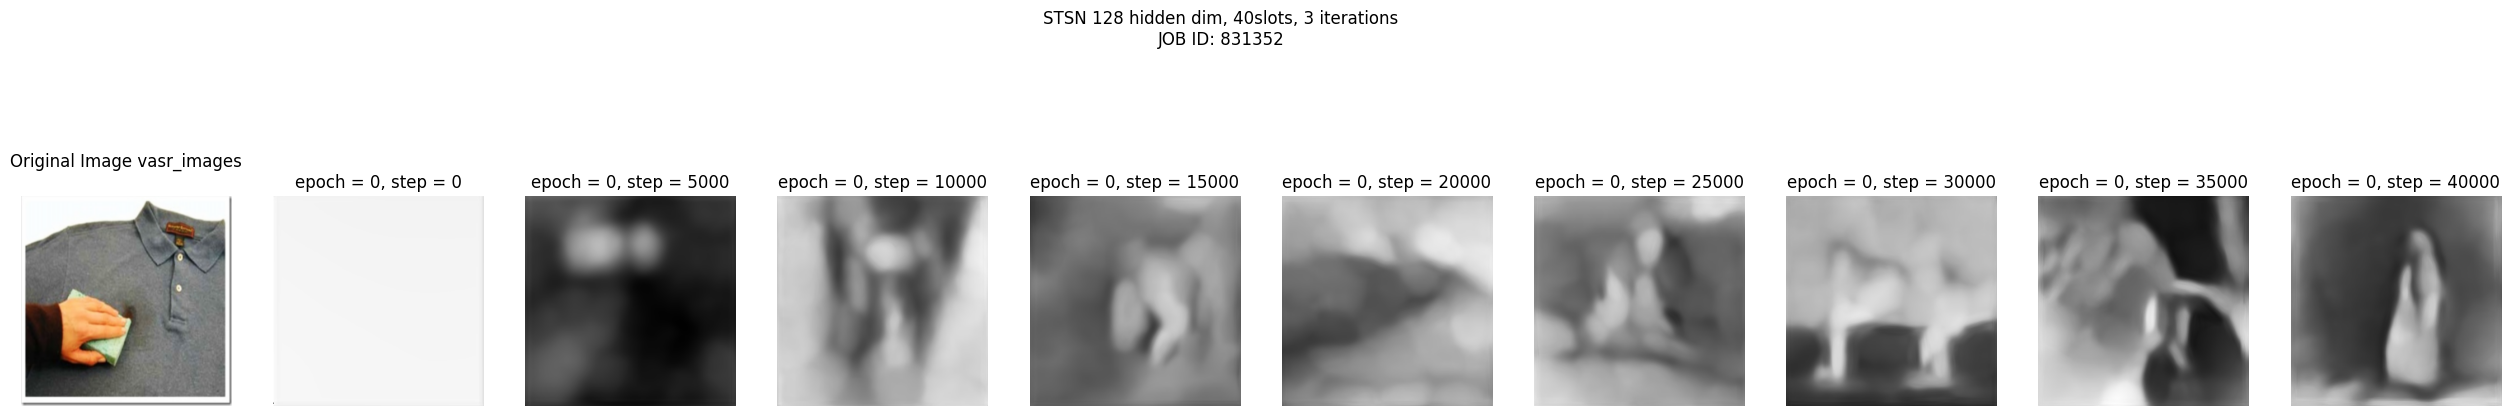

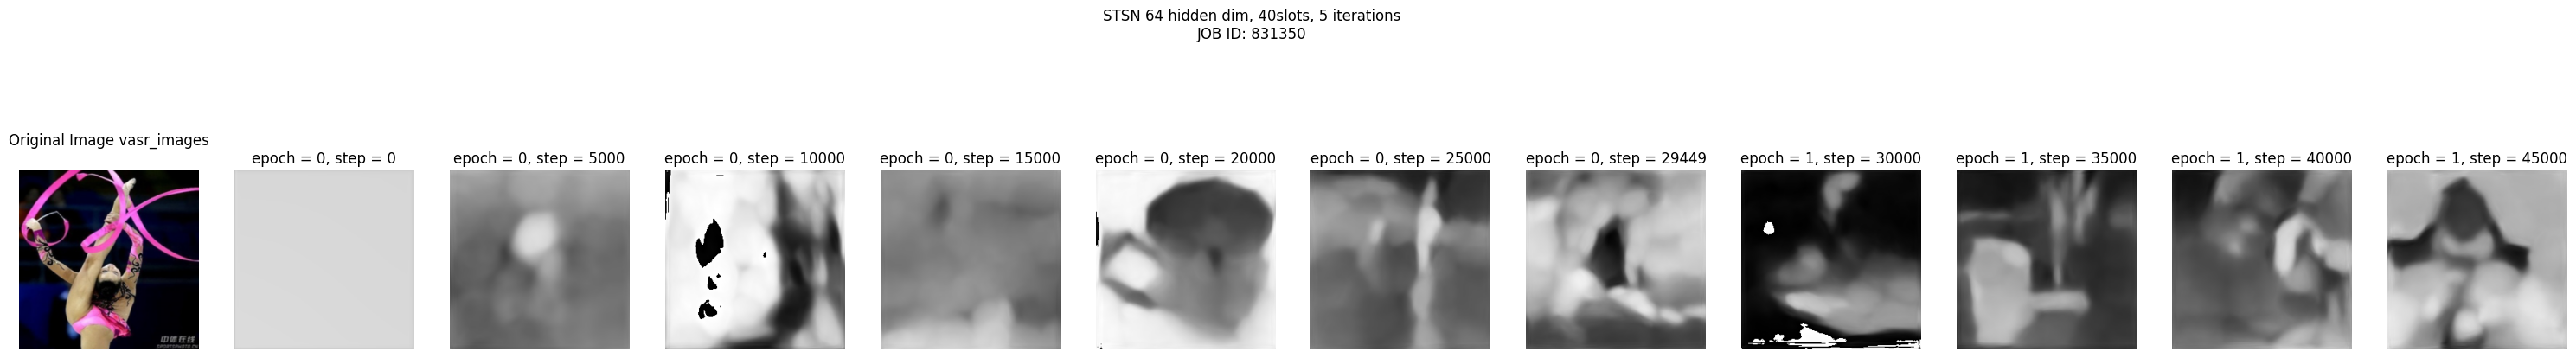

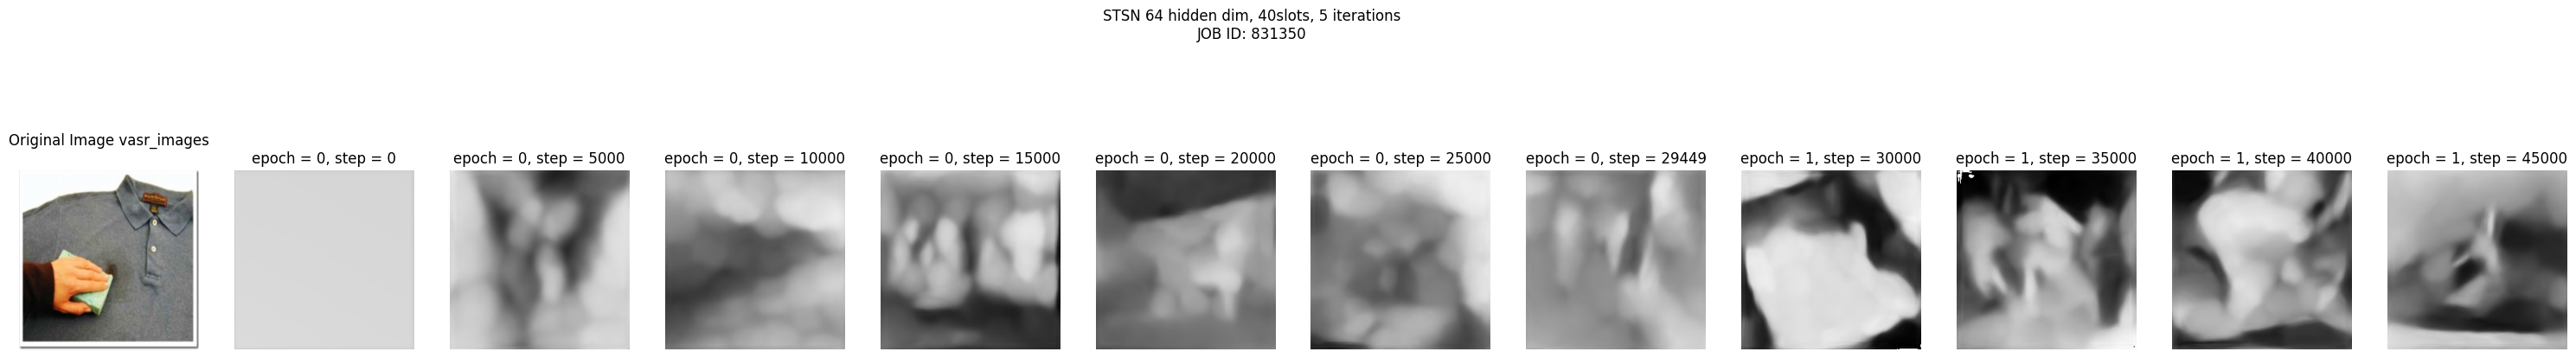

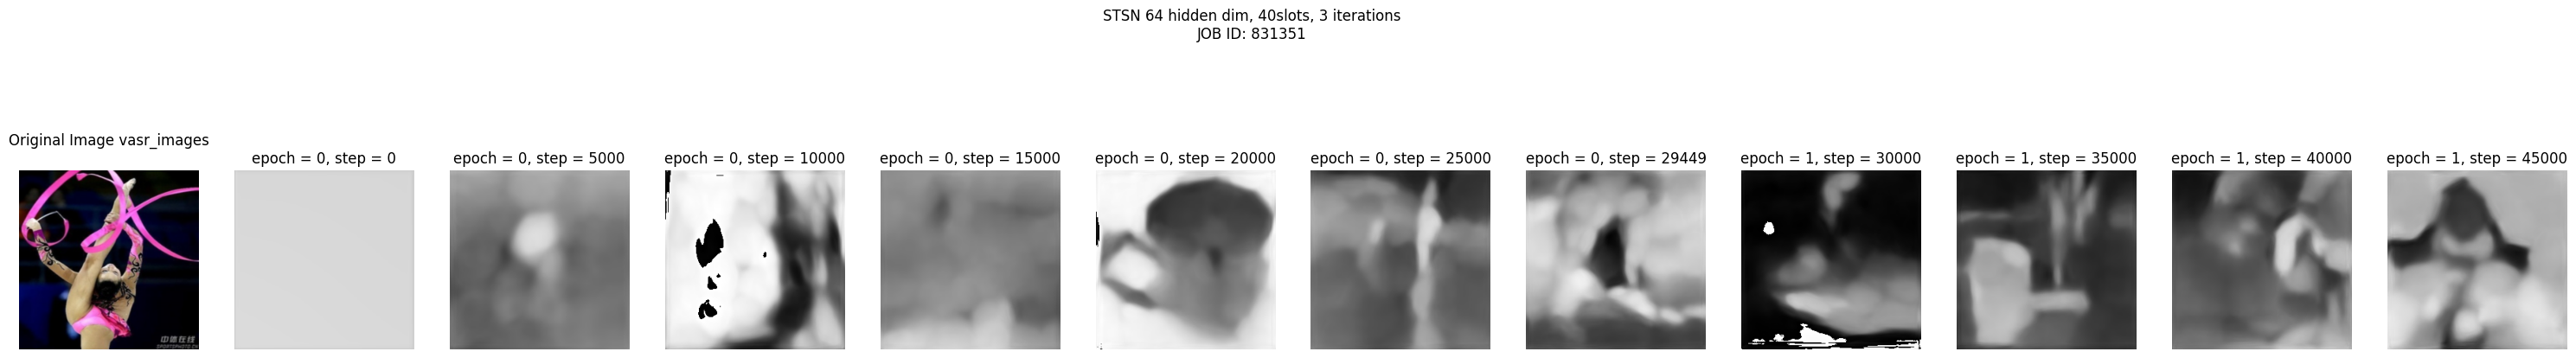

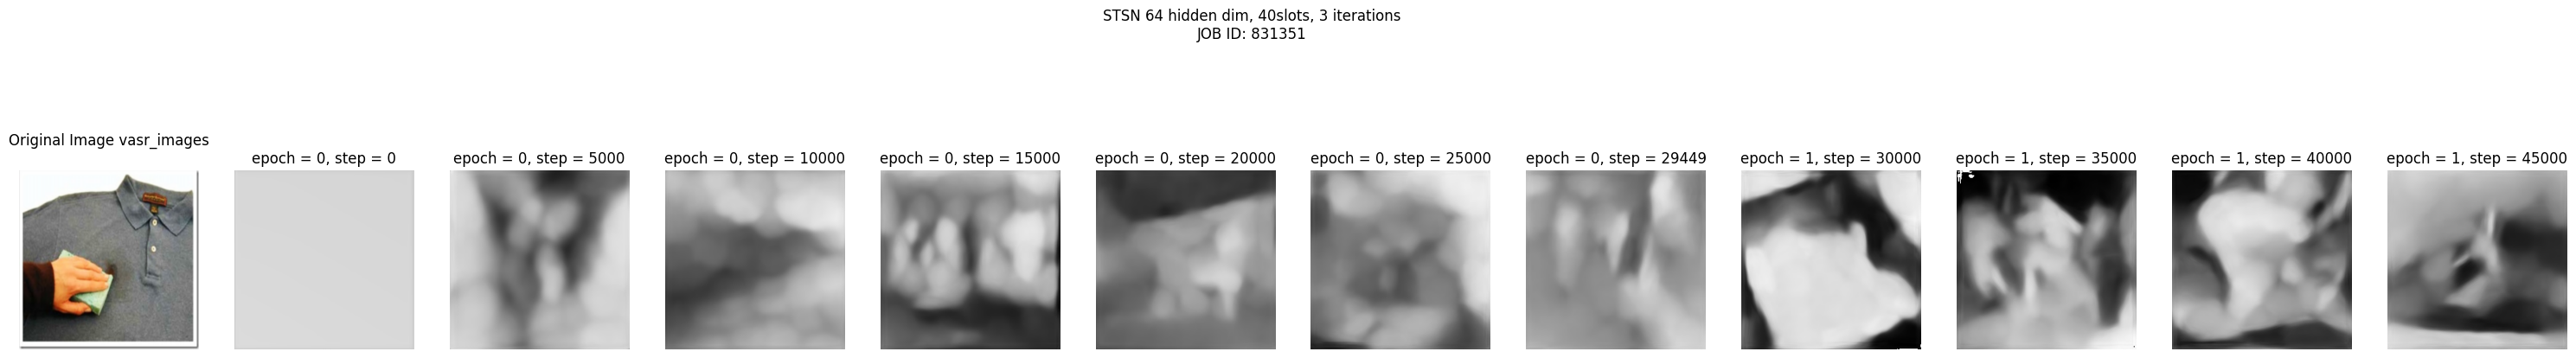

In [8]:
for img_num in range(2):
    show_predictions_during_training(
        DATA_ROOT,
        img_num=img_num,
        # batch_num=0,
        job_id=831348,
        dataset="vasr_images ",  # "bongard_hoi_images", "vasr_images"
        # epochs=None,
        # force_gray_scale=True,
        # img_kwargs={"cmap": cm.Greys_r},
    )
    # if img_num == 0:
    plt.suptitle("STSN 128 hidden dim, 20slots, 3 iterations\nJOB ID: 831348")
    plt.show()

for img_num in range(2):
    show_predictions_during_training(
        DATA_ROOT,
        img_num=img_num,
        # batch_num=0,
        job_id=831352,
        dataset="vasr_images ",  # "bongard_hoi_images", "vasr_images"
        # epochs=None,
        # force_gray_scale=True,
        # img_kwargs={"cmap": cm.Greys_r},
    )
    # if img_num == 0:
    plt.suptitle("STSN 128 hidden dim, 40slots, 3 iterations\nJOB ID: 831352")
    plt.show()

for img_num in range(2):
    show_predictions_during_training(
        DATA_ROOT,
        img_num=img_num,
        # batch_num=0,
        job_id=831350,
        dataset="vasr_images ",  # "bongard_hoi_images", "vasr_images"
        # epochs=None,
        # force_gray_scale=True,
        # img_kwargs={"cmap": cm.Greys_r},
    )
    # if img_num == 0:
    plt.suptitle("STSN 64 hidden dim, 40slots, 5 iterations\nJOB ID: 831350")
    plt.show()

for img_num in range(2):
    show_predictions_during_training(
        DATA_ROOT,
        img_num=img_num,
        # batch_num=0,
        job_id=831351,
        dataset="vasr_images ",  # "bongard_hoi_images", "vasr_images"
        # epochs=None,
        # force_gray_scale=True,
        # img_kwargs={"cmap": cm.Greys_r},
    )
    # if img_num == 0:
    plt.suptitle("STSN 64 hidden dim, 40slots, 3 iterations\nJOB ID: 831351")
    plt.show()

In [10]:
def plot_slot(
    h5_file,
    # batch_num,
    img_num,
    dataset: str,
    epoch: int,
    step: int,
    slot_id: int,
    ax,  #: plt.Axes | None = None,
    force_gray_scale: bool = False,
    **kwargs,
):
    task_name = f"{dataset}__epoch={epoch}__step={step}"
    recons = np.array(h5_file[task_name]["recons"])[img_num][0]
    ax = ax or plt.gca()
    ax.set_title(f"Slot {slot_id}")
    plot_image(np.transpose(recons[slot_id], (2, 0, 1)), ax, force_gray_scale, **kwargs)


def plot_slots(
    data_root,
    # batch_num,
    job_id: int,
    img_num,
    dataset: str,
    epoch: int,
    step: int,
    slot_ids=None,  #: list[int] | None = None,
    fig_shape=None,  #: tuple[int, int] | None = None,
    figsize=None,  #: tuple[int, int] | None = None,
    force_gray_scale: bool = False,
    fig_kwargs: dict = {},
) -> None:
    task_name = f"{dataset}__epoch={epoch}__step={step}"

    x = h5py.File(os.path.join(data_root, f"{job_id}_slots.hy"))
    recons = np.array(x[task_name]["recons"])[img_num][0]

    if slot_ids is None:
        slot_ids = list(range(recons.shape[0]))
        slot_ids.sort()

    if fig_shape is None:
        fig_shape = (1, len(slot_ids) + 1)
    fig, axes = plt.subplots(*fig_shape, figsize=figsize or (10, 5))

    # TODO: make it work when len(slot_ids) != fig_shape[0] * fig_shape[1] - 1
    for i, (slot, ax) in enumerate(zip(slot_ids, axes.flat[1:])):
        if i == 0:
            axes.flat[0].set_title("Reconstructed image")
            plot_image(
                np.array(x[task_name]["pred_img"])[img_num][0],
                axes.flat[0],
                force_gray_scale=force_gray_scale,
                **fig_kwargs,
            )
        ax.set_title(f"Slot {slot}")
        plot_slot(
            x,
            img_num,
            dataset,
            epoch,
            step,
            slot,
            ax,
            force_gray_scale=force_gray_scale,
            **fig_kwargs,
        )
    x.close()

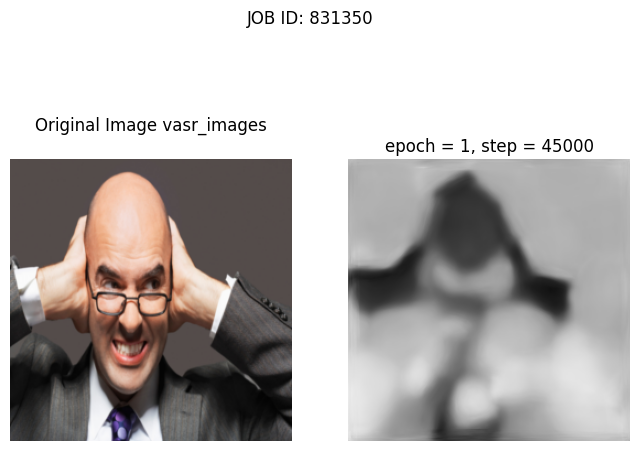

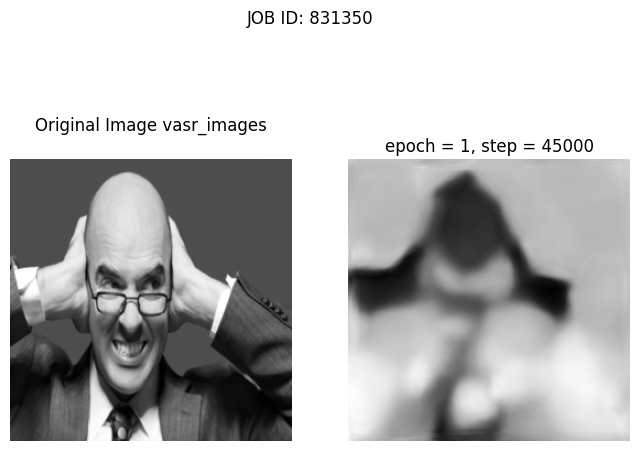

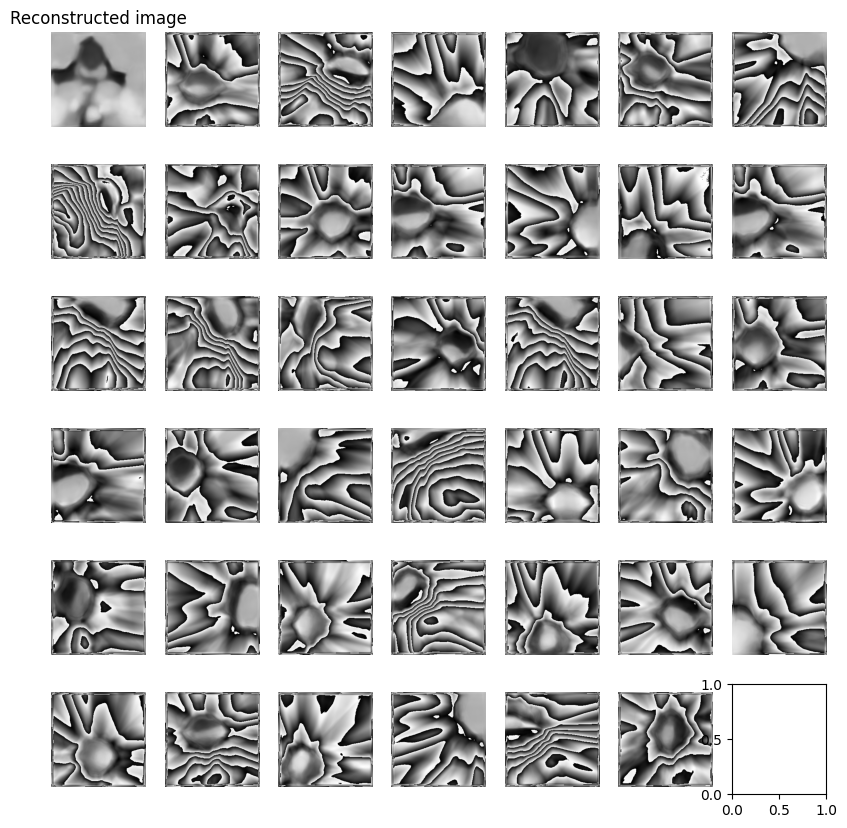

In [11]:
show_predictions_during_training(
    DATA_ROOT,
    img_num=0,
    job_id=831350,
    dataset="vasr_images",
    # epochs=None,
    epochs_slots=[("vasr_images", (1, 45_000))],
)
show_predictions_during_training(
    DATA_ROOT,
    img_num=0,
    job_id=831350,
    dataset="vasr_images",
    # epochs=None,
    epochs_slots=[("vasr_images", (1, 45_000))],
    force_gray_scale=True,
    img_kwargs={"cmap": plt.get_cmap("gray")},
)

# takes some time (~340ms per slot)
plot_slots(
    DATA_ROOT,
    img_num=0,
    job_id=831350,
    dataset="vasr_images",
    epoch=1,
    step=45_000,
    slot_ids=None,
    # batch_num=0,
    fig_shape=(6, 7),
    figsize=(10, 10),
)
[ax.set_title("") for ax in plt.gcf().axes[1:]]
plt.show()

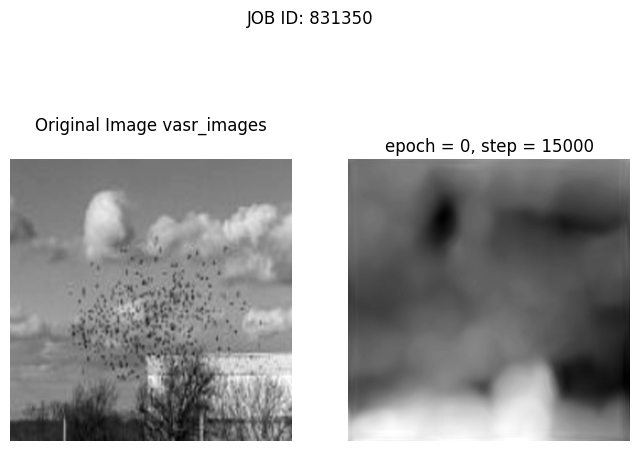

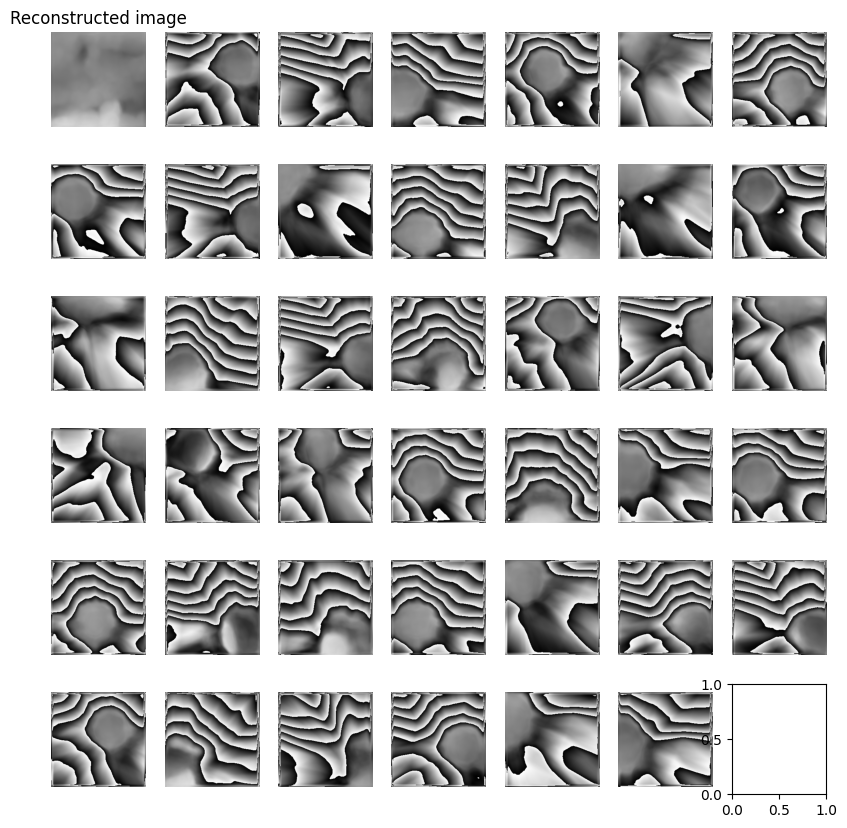

In [12]:
show_predictions_during_training(
    DATA_ROOT,
    img_num=0,
    job_id=831350,
    dataset="vasr_images",
    # epochs=None,
    epochs_slots=[("vasr_images", (0, 15_000))],
    force_gray_scale=True,
    img_kwargs={"cmap": plt.get_cmap("gray")},
)

# takes some time (~340ms per slot)
plot_slots(
    DATA_ROOT,
    img_num=0,
    job_id=831350,
    dataset="vasr_images",
    epoch=0,
    step=15_000,
    slot_ids=None,
    # batch_num=0,
    fig_shape=(6, 7),
    figsize=(10, 10),
)
[ax.set_title("") for ax in plt.gcf().axes[1:]]
plt.show()

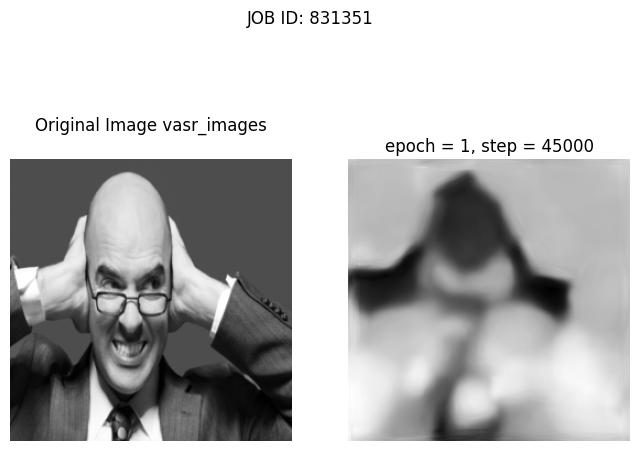

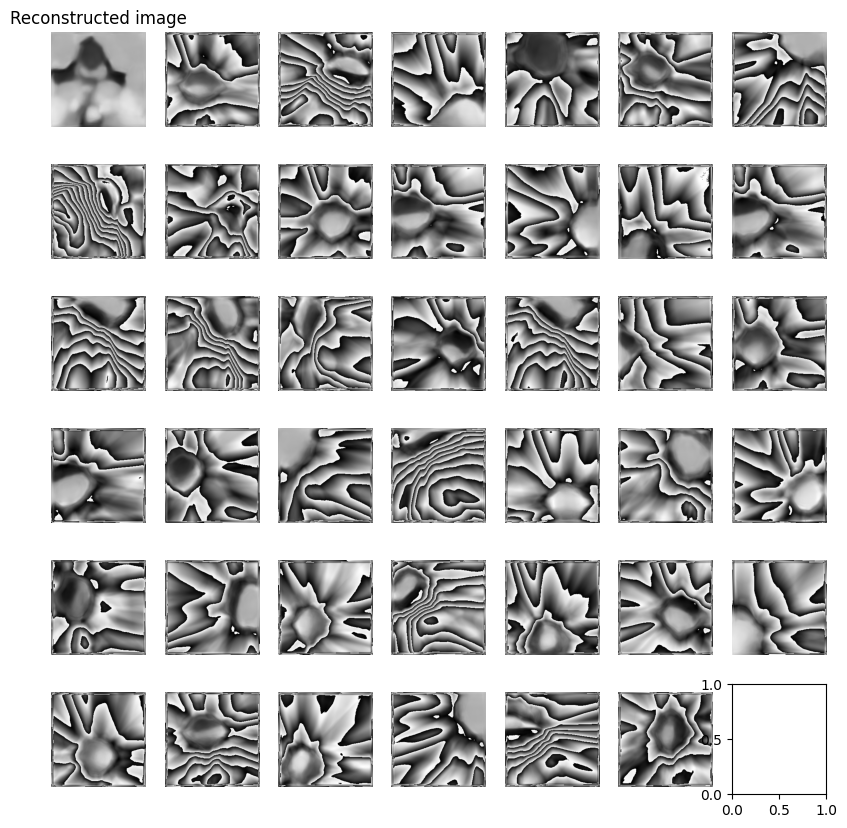

In [15]:
# show_predictions_during_training(
#     DATA_ROOT,
#     img_num=0,
#     job_id=831350,
#     dataset="vasr_images",
#     # epochs=None,
#     epochs_slots=[("vasr_images", (1, 45_000))],
# )
show_predictions_during_training(
    DATA_ROOT,
    img_num=0,
    epochs=None,
    job_id=831351,
    epochs_slots=[("vasr_images", (1, 45_000))],
    force_gray_scale=True,
    img_kwargs={"cmap": plt.get_cmap("gray")},
)

# takes some time (~340ms per slot)
plot_slots(
    DATA_ROOT,
    img_num=0,
    job_id=831351,
    dataset="vasr_images",
    epoch=1,
    step=45_000,
    slot_ids=None,
    # batch_num=0,
    fig_shape=(6, 7),
    figsize=(10, 10),
)
[ax.set_title("") for ax in plt.gcf().axes[1:]]
plt.show()

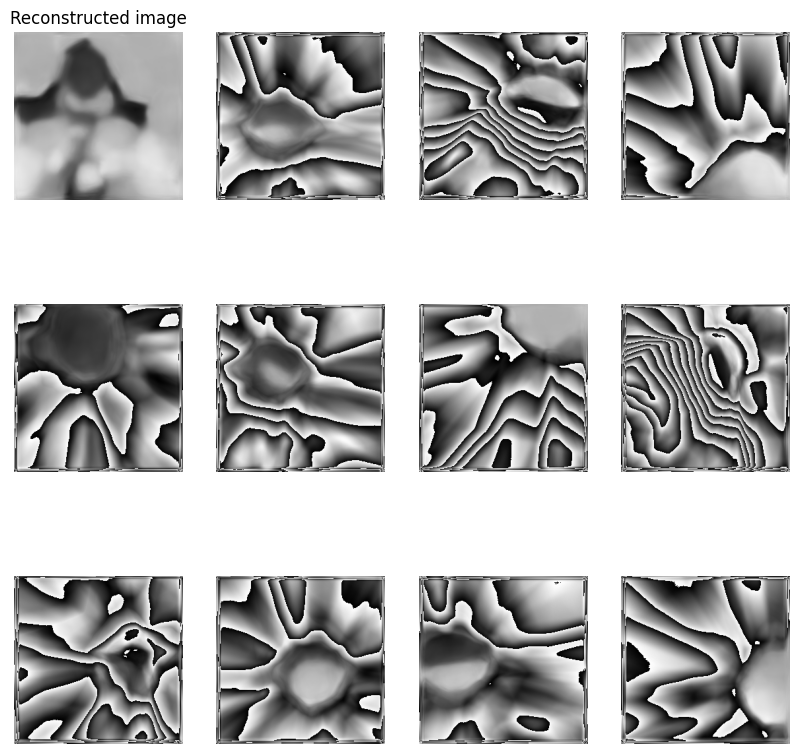

In [14]:
# takes some time (~340ms per slot)
plot_slots(
    DATA_ROOT,
    img_num=0,
    job_id=831351,
    dataset="vasr_images",
    epoch=1,
    step=45_000,
    slot_ids=range(11),
    # batch_num=0,
    fig_shape=(3, 4),
    figsize=(10, 10),
)
[ax.set_title("") for ax in plt.gcf().axes[1:]]
plt.show()